Error: 0.06614137226206705-- a:1.8600662368042573, b:-0.7962243178421666
Error: 0.01831248988715221-- a:1.3533605603913972, b:-0.6206735673234249
Error: 0.011422762970211432-- a:1.1032234861838637, b:-0.347590814908577
Error: 0.007176247674245229-- a:0.9068452261129998, b:-0.13319830250762849
Error: 0.0045588881799908-- a:0.7526720746347257, b:0.0351175247039557
Error: 0.0029456664570710403-- a:0.6316334187867452, b:0.16725934893398114
Error: 0.0019513497294632626-- a:0.536608078323685, b:0.2710015934995427
Error: 0.001338497980224941-- a:0.46200533867114346, b:0.3524478227325071
Error: 0.0009607639482851428-- a:0.4034360271954487, b:0.41638983867834906
Error: 0.0007279458172072266-- a:0.35745428091221954, b:0.4665896016596849
1.6930984012182055
0.037219754002487955


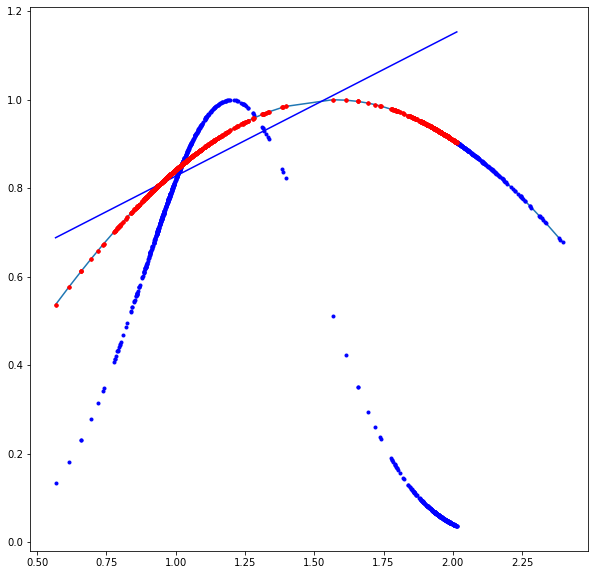

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import math 
import warnings
warnings.filterwarnings('ignore')


figure(figsize=(10,10))

boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['target'])
data = pd.concat([features, target], axis=1)

x = data['RM']
X1 = sorted(np.array(x/x.mean()))
X = X1 + [i+1 for i in X1]

Y = np.sin(X)
plt.plot(X,Y)

n = int(0.8*len(X))
x_train, y_train, x_test, y_test = X[:n], Y[:n], X[n:], Y[n:]

w = np.exp([-(1.2-i)**2/(2*0.1) for i in x_train])
plt.plot(x_train, y_train, 'r.')
plt.plot(x_train, w, 'b.')

def h(x, a, b):
    return a*x+b

def error(a, x, b, y, w):
    e=0
    m = len(x)
    for i in range(m):
        e += np.power(h(x[i],a,b)-y[i],2)*w[i]
    return (1/(2*m))*e

def step_gradient(a,x,b,y,learning_rate, w):
    grad_a = 0
    grad_b = 0
    m=len(x)
    for i in range(m):
        grad_a += (2/m)*((h(x[i],a,b)-y[i])*x[i])*w[i]
        grad_b += (2/m)*(h(x[i],a,b)-y[i])*w[i]
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a,b

def descend(initial_a, initial_b, x, y, learning_rate, iteration, w):
    a = initial_a
    b = initial_b
    for i in range(iteration):
        e = error(a, x, b, y, w)
        if i%1000 == 0:
            print(f'Error: {e}-- a:{a}, b:{b}')
        a, b = step_gradient(a, x, b, y, learning_rate, w)
    return a, b

a = 1.8600662368042573
b = -0.7962243178421666

learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations, w)
H = [i*final_a + final_b for i in x_train]

plt.plot(x_train, y_train, 'r.', x_train, H, 'b')
print(error(a, x_test, b, y_test, w))
print(error(final_a, x_test, final_b, y_test, w))
plt.plot(x_test, y_test, 'b.', x_train, y_train, 'r.')

![graph](Program_9.png)